**Historical stock market data for current Nifty 50 companies, from 2000-2021. Each record represents a single day of trading and includes the ticker name, volume, and high, low, open, and close prices.**

In [1]:
#let importing a libraries as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s=pd.read_csv("/kaggle/input/nifty50-stock-market-data/NIFTY50_all.csv")
s

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [3]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

# datatypes Corrections

In [4]:
#to change datatype into date
s['Date']=pd.to_datetime(s["Date"])

In [5]:
s["Date"].dtype

dtype('<M8[ns]')

# merging two tables with common columns 

In [6]:
m=pd.read_csv("/kaggle/input/nifty50-stock-market-data/stock_metadata.csv")
m

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018
5,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024
6,Bharti Airtel Ltd.,TELECOM,BHARTIARTL,EQ,INE397D01024
7,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011
8,Britannia Industries Ltd.,CONSUMER GOODS,BRITANNIA,EQ,INE216A01030
9,Cipla Ltd.,PHARMA,CIPLA,EQ,INE059A01026


In [7]:
#to merging two different tables 
df=pd.merge(s, m, on=['Symbol','Series'], how='inner')

In [8]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2012-01-17,ADANIPORTS,EQ,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
1,2012-01-18,ADANIPORTS,EQ,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
2,2012-01-19,ADANIPORTS,EQ,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
3,2012-01-20,ADANIPORTS,EQ,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
4,2012-01-23,ADANIPORTS,EQ,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042


In [9]:
#To find information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207850 entries, 0 to 207849
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                207850 non-null  datetime64[ns]
 1   Symbol              207850 non-null  object        
 2   Series              207850 non-null  object        
 3   Prev Close          207850 non-null  float64       
 4   Open                207850 non-null  float64       
 5   High                207850 non-null  float64       
 6   Low                 207850 non-null  float64       
 7   Last                207850 non-null  float64       
 8   Close               207850 non-null  float64       
 9   VWAP                207850 non-null  float64       
 10  Volume              207850 non-null  int64         
 11  Turnover            207850 non-null  float64       
 12  Trades              118547 non-null  float64       
 13  Deliverable Volume  197043 no

## 1.Ranking overall, by Industry and by single title (top 5), using mean Volume (and Trades)

In [10]:
#To findout overall rating
overall_ranking = df.groupby('Symbol').agg({'Volume': 'mean', 'Trades': 'mean'}).rank(ascending=False)


In [11]:
#To findout indstry ranking
industry_ranking = df.groupby('Industry').agg({'Volume': 'mean', 'Trades': 'mean'}).rank(ascending=False)

In [12]:
#To single title ranking
single_title_ranking =df.groupby(['Symbol', 'Company Name']).agg({'Volume': 'mean', 'Trades': 'mean'}).rank(ascending=False)

In [13]:
# Top 5 Values of overall rating
overall_ranking.head(5)

,Volume,Trades
Symbol,,
ADANIPORTS,17.0,32.0
ASIANPAINT,40.0,36.0
AXISBANK,9.0,5.0
BAJAJ-AUTO,43.0,42.0
BAJAJFINSV,45.0,45.0


In [14]:
# Top 5 Values of indstry ranking
industry_ranking.head(5)

,Volume,Trades
Industry,,
AUTOMOBILE,8.0,8.0
CEMENT & CEMENT PRODUCTS,13.0,13.0
CONSTRUCTION,11.0,2.0
CONSUMER GOODS,10.0,12.0
ENERGY,4.0,7.0


In [15]:
# Top 5 Values of single title ranking
single_title_ranking.head(5)

,,Volume,Trades
Symbol,Company Name,,
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,17.0,32.0
ASIANPAINT,Asian Paints Ltd.,40.0,36.0
AXISBANK,Axis Bank Ltd.,9.0,5.0
BAJAJ-AUTO,Bajaj Auto Ltd.,43.0,42.0
BAJAJFINSV,Bajaj Finserv Ltd.,45.0,45.0


## 2.Ranking of Must trading stock Since Inception (using Trades)

In [16]:
#To findout inception ranking
inception_ranking = df.groupby('Symbol').agg({'Trades': 'sum'}).rank(ascending=False)

In [17]:
#Top 5 inception ranking
top5=inception_ranking.head(5)

<Figure size 1000x800 with 0 Axes>

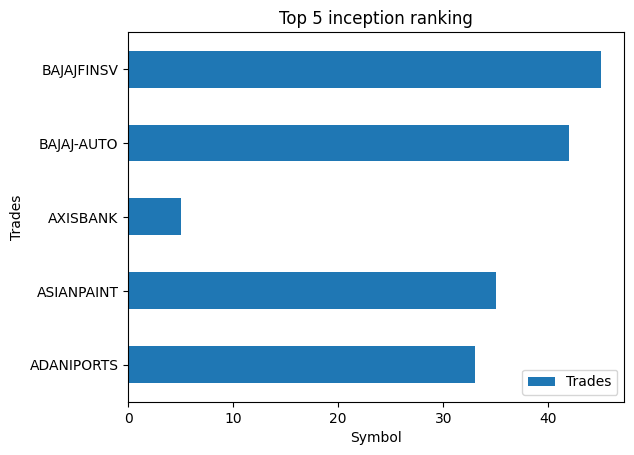

In [18]:
#To plotting
plt.figure(figsize=(10,8))
top5.plot(kind="barh")
plt.title("Top 5 inception ranking")
plt.xlabel("Symbol")
plt.ylabel("Trades")
plt.show()

## 3.Top 5 best stocks using delta price % Since Inception

In [19]:
#To findout price inception from first to last
price_since_inception = df.groupby('Symbol').agg({'Close': ['first', 'last']})

In [20]:
#from formula delta we are findout stock price using delta % price
price_since_inception['Delta_Price'] = (price_since_inception['Close']['last'] - price_since_inception['Close']['first']) / price_since_inception['Close']['first'] * 100

In [21]:
# Top 5 Values
top5delta=price_since_inception.sort_values(by='Delta_Price', ascending=False).head(5)

<Figure size 1000x800 with 0 Axes>

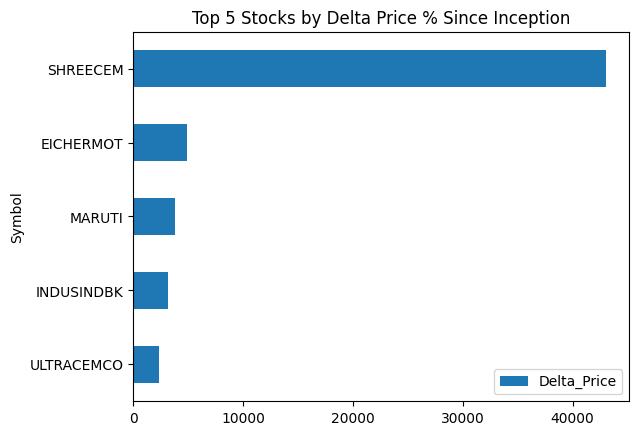

In [22]:
plt.figure(figsize=(10,8))
top5delta.plot(kind='barh',y='Delta_Price',title='Top 5 Stocks by Delta Price % Since Inception')
plt.gca().invert_yaxis()
plt.show()

**SHRECEM symbol Companies has more delta percentage as if other 50 companies as percent of 43005.019305%**

## 4.Top 5 worst stocks using delta price % Since Inception

In [23]:
top5worst=price_since_inception.sort_values(by='Delta_Price',ascending=True).head(5)

In [24]:
price_since_inception.sort_values(by='Delta_Price',ascending=True).head(5)

Close         Delta_Price
             first    last            
Symbol                                
WIPRO      2724.20  492.75  -81.912121
ITC         708.50  202.60  -71.404375
IOC         270.85   90.85  -66.457449
SUNPHARMA  1835.05  654.45  -64.336122
COALINDIA   342.55  133.05  -61.158955

<Figure size 1000x800 with 0 Axes>

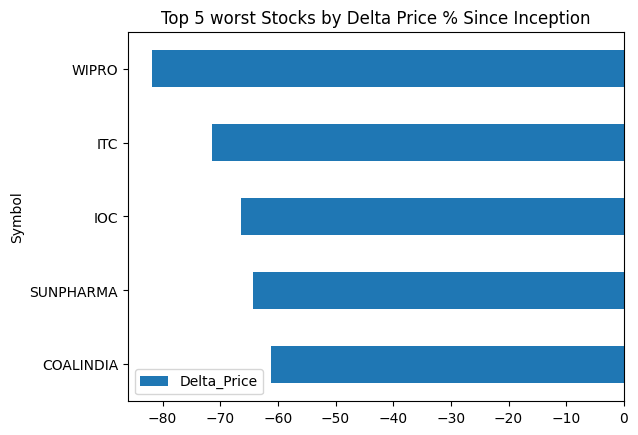

In [25]:
plt.figure(figsize=(10,8))
top5worst.plot(kind='barh',y='Delta_Price' ,title='Top 5 worst Stocks by Delta Price % Since Inception')
plt.gca().invert_yaxis()
plt.show()

**WIPRO symbol Companies worst Stocks by Delta Price % Since Inception as if other 50 companies as percent of -81.912121%**

## 5.Standard deviation and Coefficient of Variation

In [26]:
# Calculate standard deviation for each stock
std_deviation = df.groupby('Symbol')['Close'].std()

In [27]:
df.groupby('Symbol')['Close'].std()

Symbol
ADANIPORTS     119.857232
ASIANPAINT    1074.476439
AXISBANK       354.932553
BAJAJ-AUTO     775.095766
BAJAJFINSV    2873.522615
BAJFINANCE    1963.434023
BHARTIARTL     178.730332
BPCL           184.338560
BRITANNIA     1364.982005
CIPLA          289.151156
COALINDIA       74.144478
DRREDDY       1093.927165
EICHERMOT     9702.651623
GAIL           129.628103
GRASIM        1152.009612
HCLTECH        411.674568
HDFC           709.430515
HDFCBANK       635.675021
HEROMOTOCO     621.085091
HINDALCO        56.630293
HINDUNILVR     652.670634
ICICIBANK      368.725374
INDUSINDBK     562.718180
INFY           965.789156
IOC            138.346890
ITC            328.165405
JSWSTEEL       396.339698
KOTAKBANK      418.478415
LT             587.604848
M&M            370.493099
MARUTI        2740.723734
NESTLEIND     4182.705331
NTPC            35.857614
ONGC           385.197861
POWERGRID       41.947928
RELIANCE       571.046753
SBIN           857.766537
SHREECEM      7790.209999
SUNPH

In [28]:
# To mean values in close price in symbol stocks
mean_close_price = df.groupby('Symbol')['Close'].mean()

In [29]:
df.groupby('Symbol')['Close'].mean()

Symbol
ADANIPORTS     294.111766
ASIANPAINT    1247.410903
AXISBANK       824.058898
BAJAJ-AUTO    2190.412196
BAJAJFINSV    2758.657451
BAJFINANCE    2627.858937
BHARTIARTL     446.114790
BPCL           444.377629
BRITANNIA     1688.492347
CIPLA          540.421052
COALINDIA      287.953464
DRREDDY       1828.382689
EICHERMOT     6751.063167
GAIL           292.120090
GRASIM        1753.151150
HCLTECH        642.173981
HDFC          1284.071005
HDFCBANK      1007.330390
HEROMOTOCO    2665.182060
HINDALCO       159.223959
HINDUNILVR     868.433314
ICICIBANK      550.995524
INDUSINDBK     494.322698
INFY          1708.548912
IOC            318.582614
ITC            420.273690
JSWSTEEL       671.924877
KOTAKBANK      760.671292
LT            1534.274355
M&M            686.872616
MARUTI        2925.005094
NESTLEIND     7512.039647
NTPC           150.992723
ONGC           491.138193
POWERGRID      141.382152
RELIANCE      1011.316839
SBIN           965.895543
SHREECEM      6565.809539
SUNPH

In [30]:
# Calculate coefficient of variation (CV)
cv = std_deviation / mean_close_price

In [31]:
cv

Symbol
ADANIPORTS    0.407523
ASIANPAINT    0.861365
AXISBANK      0.430713
BAJAJ-AUTO    0.353858
BAJAJFINSV    1.041638
BAJFINANCE    0.747161
BHARTIARTL    0.400638
BPCL          0.414824
BRITANNIA     0.808403
CIPLA         0.535048
COALINDIA     0.257488
DRREDDY       0.598303
EICHERMOT     1.437204
GAIL          0.443749
GRASIM        0.657108
HCLTECH       0.641064
HDFC          0.552485
HDFCBANK      0.631049
HEROMOTOCO    0.233037
HINDALCO      0.355664
HINDUNILVR    0.751550
ICICIBANK     0.669198
INDUSINDBK    1.138362
INFY          0.565269
IOC           0.434258
ITC           0.780837
JSWSTEEL      0.589857
KOTAKBANK     0.550144
LT            0.382986
M&M           0.539391
MARUTI        0.936998
NESTLEIND     0.556800
NTPC          0.237479
ONGC          0.784296
POWERGRID     0.296699
RELIANCE      0.564657
SBIN          0.888053
SHREECEM      1.186481
SUNPHARMA     0.483692
TATAMOTORS    0.563037
TATASTEEL     0.322052
TCS           0.426743
TECHM         0.578754
TITA

In [32]:
cv.SHREECEM

1.1864812638129552

In [33]:
#To write a rule for coefficient of variation (CV) if as a rule of thumb, a CV >= 1 indicates a relatively high variation, while a CV < 1 can be considered low.
# Assuming cv is the coefficient of variation for a specific stock
cv_threshold = 1.0

# Assuming cv is a Pandas Series
if (cv >= cv.SHREECEM).any(): #any() is function used it.
    print("High Variation")
else:
    print("Low Variation")


High Variation
